# Anotações do modulo 4: Python Avançado


Tipos de aprendizado: Machine Learning!


1.   Aprendizado supervisionado: apresenta para o modelo dados de entrada E saída.


  *   Classificação: classificar em diferentes **instâncias**

      Modelo usado: KNN (K Nearest Neighbor). Calcula a partir da distância euclidiana (d = sqrt(x-a)^2+(x-b)^2), os vizinhos mais próximos

---


  *   Regressão: valores **numéricos**


2.   Aprendizado não supervisionado: apresenta dados e pede ao modelo que ***aprenda*** com os dados mostrados.


  *   Associação: 

  SVM(Support Vector Machine): o maior grau de separação (e distância) entre as duas classes, instâncias: sistema binário.

  Árvore de Decisão: A cada decisão, a entropia diminui e, por conseguinte, a associação das escolhas.

  *   Clusterização: ***Junção*** de características

       KMeans: sem dados de entrada e saída: agrupamento por centroides

---

Módulo para aprendizado de máquina: ***Scikit learn***.

Coleta -> Preparação de Dados -> Seleção do Modelo -> Treinamento -> Avaliação -> Sintonia de Parâmetros -> previsão.

Módulo para Deep learn: treinamento de maneira distribuida:  ***TensorFlow***
treinmaneto de maneira paralela e BackEnd

In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt

K-means: não supervisionado

In [ ]:
Coleta de dados

In [ ]:
dados = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,40,57,59,25,65,47,49,48,35,33,44,45,38,43,51,46],
         'y': [79,54,65,18,37,69,45,84,81,42,12,33,34,39,38,44,33,38,51,46,42,51,46,49,67,41,58,46,61,32]}

In [ ]:
preparação de dados

In [ ]:
df = DataFrame(dados,columns=['x','y'])
df

,x,y
0,25,79
1,34,54
2,22,65
3,27,18
4,33,37
5,33,69
6,31,45
7,22,84
8,35,81
9,34,42


In [ ]:
df.head()

,x,y
0,25,79
1,34,54
2,22,65
3,27,18
4,33,37


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2) # cria o obj para indentificar 2 clusters
kmeans.fit(df)
centroids = kmeans.cluster_centers_ # encontra coordenadas
print(centroids)
# encontrando X e Y

[[33.77777778 68.66666667]
 [44.66666667 38.9047619 ]]


Text(0, 0.5, 'Y')

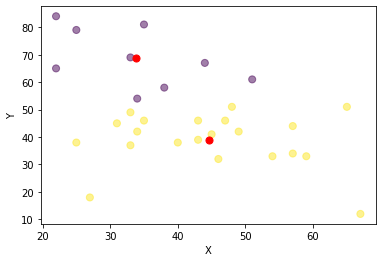

In [ ]:
#realizar o plot de dados
plt.scatter(df['x'], df['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5) #gráfico de dispersão
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)
#labels nod dados
plt.xlabel('X')
plt.ylabel('Y')

## Algoritmo supervisionado

### KNN

In [ ]:
from sklearn import neighbors, datasets # public datasets
import pandas as pd
import numpy as np #maneira eficiente com matrizes

In [ ]:
iris = datasets.load_iris() # importa o módulo
df_iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target']) 
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
#dados para array
X = df_iris.iloc[:, :-1].values # todas as linhas das colunas e excluindo a última
y = df_iris.iloc[:, 4].values # target

Divisão de dados entre treinamento e teste

In [ ]:
from sklearn.preprocessing import StandardScaler #normalizando os dados
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split # dividir em dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 20% para teste


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test) #prever o modelo

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15  0  0]
 [ 0  9  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



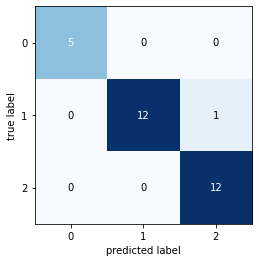

In [ ]:
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig,ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

### Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics # avaliação

In [ ]:
clf = DecisionTreeClassifier() # instanciar
clf = clf.fit(X_train, y_train) #treinamento
y_pred = clf.predict(X_test)

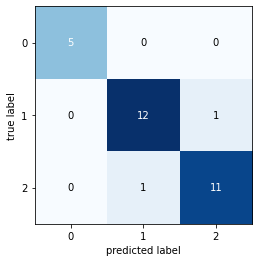

In [ ]:
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig,ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [ ]:
#visualização da árvore de decisão
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

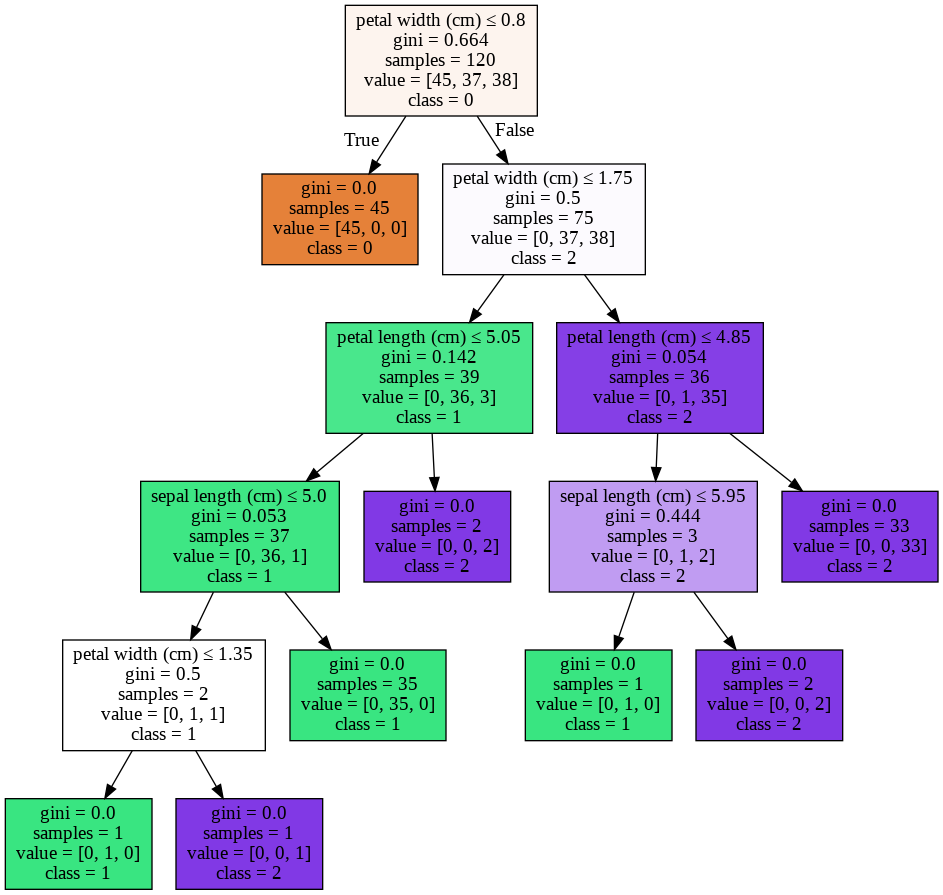

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, special_characters=True,feature_names=iris.feature_names, class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       0.92      0.92      0.92        13
         2.0       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.95      0.95      0.95        30
weighted avg       0.93      0.93      0.93        30



## SVM

In [ ]:
from sklearn.svm import SVC #svm como Classficador

In [ ]:
clf = SVC()

In [ ]:
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf.predict(X_test)
#predição de classificação

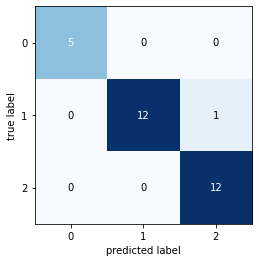

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      0.92      0.96        13
         2.0       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig,ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()
print(classification_report(y_test, y_pred))

## Redes Neurais Artificiais

Os perceptrons entram na rede neural, é calculado o sumatório e depois verifica-se com a função de ativação(se for maior que 0, por exemplo) e, por fim, tem-se a saída.

Vários perceptrons formam uma rede neural artificial; perceptron multicamada.

Ao passo do tempo, as redes neurais atualizam o peso dos neurônio para atualizar as características do Dataset.

## Deep Learning

Várias camadas de redes neurais escondidas. Só é possível graças ao poder computacional.

Rede MLP

In [ ]:
# rede neural
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5,5), random_state=1) # 5 neurônios cada rede

In [ ]:
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)

### TensorFlow

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.models import Model #importando modelo a ser implementado
import seaborn as sns

Dropout: imepede o overfitting.

In [ ]:
dataset = sns.load_dataset('iris') 
dataset.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [ ]:
x = dataset.drop(['species'], axis=1)
y= pd.get_dummies(dataset.species, prefix='output') #cada uma das classes em vetores

In [ ]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.model_selection import train_test_split # dividir em dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39) # 20% para teste

In [ ]:
from sklearn.preprocessing import StandardScaler #normalizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
entrada = Input(shape=(X_train.shape[1],)) #tem que definir SEMPRE o shape da entrada, X_train.shape[1] = 4 colunas
camada_1 = Dense(100, activation='relu')(entrada) #100 neurônios
camada_2 = Dense(50, activation='relu')(camada_1) #50 neurônios
camada_3 = Dense(25, activation='relu')(camada_2) #25 neurônios
saida = Dense(y_train.shape[1], activation='softmax')(camada_3)

In [ ]:
model = Model(inputs=entrada, outputs=saida) #define o modelo

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               500       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 78        
Total params: 6,903
Trainable params: 6,903
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
#treinamento
history = model.fit(X_train, y_train, batch_size=4, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
24/24 [==============================] - 0s 5ms/step - loss: 0.0322 - acc: 0.9896 - val_loss: 0.2243 - val_acc: 0.8750
Epoch 2/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0306 - acc: 0.9896 - val_loss: 0.1977 - val_acc: 0.9167
Epoch 3/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0328 - acc: 0.9792 - val_loss: 0.2211 - val_acc: 0.8750
Epoch 4/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0291 - acc: 0.9896 - val_loss: 0.2339 - val_acc: 0.8750
Epoch 5/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0274 - acc: 0.9896 - val_loss: 0.2077 - val_acc: 0.8750
Epoch 6/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0294 - acc: 0.9896 - val_loss: 0.1725 - val_acc: 0.9167
Epoch 7/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0338 - acc: 0.9896 - val_loss: 0.2511 - val_acc: 0.8750
Epoch 8/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0245 - acc: 0.98

In [ ]:
acuracia = model.evaluate(X_test, y_test, verbose=1)
print('Acurácia de:', acuracia)

1/1 [==============================] - 0s 15ms/step - loss: 0.1921 - acc: 0.9667
Acurácia de: [0.19211643934249878, 0.9666666388511658]


# Programação Concorrente e Paralela

Multiprocessamento => Vários processos em execução.

CPU orquestra como as threads vão operar. 

Thread é a menor parte do processo

Multiprocessing => recursos isolados.
Multithread => compartilham o mesmo recurso

In [ ]:
import multiprocessing
multiprocessing.cpu_count()

2

Cico de Vida de uma thread
New thread -> Start -> running (yield -> runnable->) <-> no runnable

In [2]:
import threading
import time
def threadWorker():
  print('a thread entrou no estado non running')
  time.sleep(10)
  print('a execução foi finalizada')
print('Thread criada')
mythread = threading.Thread(target=threadWorker)
print('thread no estado runnable')
mythread.start()
mythread.join()
print('thread terminated')

Thread criada
thread no estado runnable
a thread entrou no estado non running
a execução foi finalizada


In [5]:
import random
def executableThread(i):
  print(f'Thread inicializada {i}')
  time.sleep(random.randint(1,10))
  print(f'Thread finalizada {i}')
for i in range(100):
  thread = threading.Thread(target=executableThread, args=(i,))
  thread.start()
  print('numeros de threads ativas', threading.enumerate())

Thread inicializada 0
numeros de threads ativas [<_MainThread(MainThread, started 140045113182080)>, <Thread(Thread-2, started daemon 140044610217728)>, <Heartbeat(Thread-3, started daemon 140044601562880)>, <ParentPollerUnix(Thread-1, started daemon 140044537480960)>, <Thread(Thread-25, started 140044502075136)>]
Thread inicializada 1numeros de threads ativas [<_MainThread(MainThread, started 140045113182080)>, <Thread(Thread-2, started daemon 140044610217728)>, <Heartbeat(Thread-3, started daemon 140044601562880)>, <ParentPollerUnix(Thread-1, started daemon 140044537480960)>, <Thread(Thread-25, started 140044502075136)>, <Thread(Thread-26, started 140044493682432)>]

Thread inicializada 2numeros de threads ativas [<_MainThread(MainThread, started 140045113182080)>, <Thread(Thread-2, started daemon 140044610217728)>, <Heartbeat(Thread-3, started daemon 140044601562880)>, <ParentPollerUnix(Thread-1, started daemon 140044537480960)>, <Thread(Thread-25, started 140044502075136)>, <Thread

## Herança com thread

pq?


1.   complexidade do problema
2.   apenas uma função não consegue resolver o problema
3. é necessário definir um modelo que trate várias tarefas



In [6]:
from threading import Thread

class MinhaClasse(Thread):
  def __init__(self):
    Thread.__init__(self)
    print('ola contrutor')
  def run(self):
    print('thread em execução')

minhathread = MinhaClasse()
minhathread.start()
print('thread inicializado')
minhathread.join() #garante que a execução foi finalizada
print('execução foi finalizada')

ola contrutor
thread em execução


Multithread

In [2]:
from threading import Thread

class MinhaClasse(Thread):
  def __init__(self, thread_id, nome, contador):
    self.thread_id = thread_id
    self.nome = nome
    self.contador = contador
    Thread.__init__(self)
    print('ola constructor')
  def run(self):
    print(f'thread {self.nome} em execução {self.contador}')
    processo(self.nome, self.contador)
    print(f'finalizando {self.nome}')
def processo(nome,contador):
  while contador:
    print(f'Thread {nome} fazendo o processo {contador}')
    contador -=1
alicethread = MinhaClasse(1,'alice',8)
bobthread = MinhaClasse(2,'bob',8)

alicethread.start()
bobthread.start()

threads = []
threads.append(alicethread)
threads.append(bobthread)

for t in threads:
  t.join()
print('execução foi finalizada')

ola constructor
ola constructor
thread alice em execução 8
Thread alice fazendo o processo 8
Thread alice fazendo o processo 7
Thread alice fazendo o processo 6
Thread alice fazendo o processo 5
Thread alice fazendo o processo 4
Thread alice fazendo o processo 3
Thread alice fazendo o processo 2
Thread alice fazendo o processo 1
finalizando alice
thread bob em execução 8
Thread bob fazendo o processo 8
Thread bob fazendo o processo 7
Thread bob fazendo o processo 6
Thread bob fazendo o processo 5
Thread bob fazendo o processo 4
Thread bob fazendo o processo 3
Thread bob fazendo o processo 2
Thread bob fazendo o processo 1
finalizando bob
execução foi finalizada


contando threads ativas

In [9]:
import random
import threading
import time
def minhaThread(i):
  print(f'thread {i} inicializada!')
  time.sleep(random.randint(1,5))
  print(f'thread {i} finalizada!')

for i in range(random.randint(1,50)):
  thread = threading.Thread(target=minhaThread, args=(i,))
  thread.start()

time.sleep(4)
print(f'total de thread ativa {threading.active_count()}')

thread 0 inicializada!
thread 1 inicializada!
thread 2 inicializada!
thread 3 inicializada!
thread 4 inicializada!
thread 5 inicializada!
thread 6 inicializada!
thread 7 inicializada!
thread 8 inicializada!
thread 9 inicializada!
thread 10 inicializada!
thread 11 inicializada!
thread 12 inicializada!
thread 13 inicializada!
thread 14 inicializada!
thread 15 inicializada!
thread 16 inicializada!
thread 17 inicializada!
thread 18 inicializada!
thread 19 inicializada!
thread 0 finalizada!
thread 6 finalizada!
thread 10 finalizada!
thread 5 finalizada!
thread 9 finalizada!
thread 15 finalizada!
thread 19 finalizada!
thread 8 finalizada!
thread 14 finalizada!
thread 18 finalizada!
thread 2 finalizada!
thread 16 finalizada!
thread 17 finalizada!
total de thread ativa 11


em qual thread estamos?

In [13]:
def threadTarget():
  print('thread atual', threading.current_thread())

threads = []

for i in range(18):
  thread = threading.Thread(target=threadTarget)
  thread.start()
  threads.append(thread)

for thread in threads:
  thread.join()

thread atual <Thread(Thread-124, started 139653833869056)>thread atual <Thread(Thread-125, started 139653875832576)>

thread atual thread atual <Thread(Thread-127, started 139653833869056)>
<Thread(Thread-126, started 139653875832576)>thread atual <Thread(Thread-128, started 139653833869056)>

thread atual <Thread(Thread-129, started 139653875832576)>
thread atualthread atual  <Thread(Thread-130, started 139653875832576)>
<Thread(Thread-131, started 139653833869056)>
thread atual <Thread(Thread-132, started 139653909403392)>
thread atual <Thread(Thread-133, started 139653875832576)>
thread atual <Thread(Thread-134, started 139653875832576)>
thread atual <Thread(Thread-135, started 139653875832576)>
thread atual <Thread(Thread-136, started 139653875832576)>
thread atual <Thread(Thread-137, started 139653909403392)>
thread atual <Thread(Thread-138, started 139653909403392)>
thread atual <Thread(Thread-139, started 139653909403392)>
thread atual <Thread(Thread-140, started 139653875832576

In [16]:
def myChildren():
  time.sleep(5)
  print(threading.current_thread())
  print(threading.main_thread())
child = threading.Thread(target=myChildren) 
child.start()
child.join()

<Thread(Thread-142, started 139653909403392)>
<_MainThread(MainThread, started 139654685878144)>


In [ ]:
def myThread():
  time.sleep(5)

for i in range(4):
  threadName = 'thread-'+str(i)
  thread = threading.Thread(name=threadName,target=myThread)
  thread.start()

Sincronismo entre threads

Deadlock

In [25]:
import threading
import time
import random

class Filosofos(threading.Thread):
  def __init__(self,name,leftFork,rightFork):
    threading.Thread.__init__(self,name=name)
    print(f'{name} seated on the table')
    self.leftFork = leftFork
    self.rightFork = rightFork
  def run(self):
    print(f"{threading.currentThread().getName()} começou a pensar")
    while True:
      time.sleep(random.randint(1,5))
      print(f'{threading.currentThread().getName()} stopped thinking')
      self.leftFork.acquire()
      time.sleep(random.randint(1,5))
      try:
        print(f'{threading.currentThread().getName()} catch left fork')
        self.rightFork.acquire()
        try:
          print(f'{threading.currentThread().getName()} catch both forks')
        finally:
          self.rightFork.release()
          print(f'{threading.currentThread().getName()} throw right forks')
      finally:
        self.leftFork.release()
        print(f'{threading.currentThread().getName()} throw left forks')

fork1 = threading.RLock()
fork2 = threading.RLock()
fork3 = threading.RLock()
fork4 = threading.RLock()
fork5 = threading.RLock()

philosopher1 = Filosofos('Kant', fork1, fork2)
philosopher2 = Filosofos('Mises', fork2, fork3)
philosopher3 = Filosofos('Hayek', fork3, fork4)
philosopher4 = Filosofos('Routhboard', fork4, fork5)
philosopher5 = Filosofos('Durkheim', fork5, fork1)

philosopher1.start()
philosopher2.start()
philosopher3.start()
philosopher4.start()
philosopher5.start()

philosopher1.join()
philosopher2.join()
philosopher3.join()
philosopher4.join()
philosopher5.join()

Kant seated on the table
Mises seated on the table
Hayek seated on the table
Routhboard seated on the table
Durkheim seated on the table
Kant começou a pensar
Mises começou a pensar
Hayek começou a pensar
Routhboard começou a pensar
Durkheim começou a pensar
Kant stopped thinking
Mises stopped thinking
Mises catch left fork
Mises catch both forks
Mises throw right forks
Mises throw left forks
Hayek stopped thinking
Durkheim stopped thinking
Hayek catch left fork
Hayek catch both forks
Hayek throw right forks
Hayek throw left forks
Kant catch left fork
Kant catch both forks
Kant throw right forks
Kant throw left forks
Routhboard stopped thinking
Mises stopped thinking
Routhboard catch left fork
Durkheim catch left fork
Durkheim catch both forks
Durkheim throw right forks
Durkheim throw left forks
Routhboard catch both forks
Routhboard throw right forks
Routhboard throw left forks
Kant stopped thinking
Kant catch left fork
Hayek stopped thinkingDurkheim stopped thinking

Durkheim catch l

KeyboardInterrupt: ignored

Semáforos

In [4]:
import threading 
import time
import random


class TicketSeller(threading.Thread):
  ticketSold = 0
  def __init__(self,semaphore):
    threading.Thread.__init__(self)
    self.semaphore = semaphore
    print('Venda de ingressos inicializada')
  def run(self):
    global ticketsAvailable
    running = True
    while running:
      self.randomDelay()
      self.semaphore.acquire()
      if (ticketsAvailable<=0):
        running = False
      else:
        self.ticketSold = self.ticketSold + 1
        ticketsAvailable -= 1
        print(f'{self.getName()} acabou de vender 1 de {ticketsAvailable} tickets ')
    self.semaphore.release()
  def randomDelay(self):
    time.sleep(random.randint(0,4)/4)

semaphore = threading.Semaphore()
ticketsAvailable = 200

sellers=[]
for i in range(4):
  seller = TicketSeller(semaphore)
  seller.start()
  sellers.append(seller)
for seller in sellers:
  seller.join()

Venda de ingressos inicializada
Venda de ingressos inicializada
Thread-13 acabou de vender 1 de 199 tickets 
Venda de ingressos inicializada
Venda de ingressos inicializada


KeyboardInterrupt: ignored

## Queue in Python

com a lista comum, não se consegue garantir que as stacks aconteçam de maneira concorrente.

In [9]:
from queue import Queue
from threading import Thread
def consumer(q):
  while True:
    name = threading.currentThread().getName()
    print(f"Thread: {name} deseja de processar o item {q.qsize()} da queue. {time.strftime('%H:%M:%S')}")
    item = q.get()
    time.sleep(3)
    print(f"Thread: {name} terminou de processar o item {q.qsize()} da queue. {time.strftime('%H:%M:%S')}")
    q.task_done()
def producer(out_q):
  for i in range(10):
    name = threading.currentThread().getName()
    print(f"Thread: {name} começou a adicionar o item {q.qsize()} na queue. {time.strftime('%H:%M:%S')}")
    item = "item-"+str(i)
    out_q.put(item)
    print(f"Thread: {name} adicionou o item {q.qsize()} na queue. {time.strftime('%H:%M:%S')}")
  out_q.join()

if __name__ == '__main__':
  q = Queue(maxsize=3)
  threads_num = 3
  for i in range(threads_num):
    thread = threading.Thread(name="ThreadConsumer-"+str(i), target=consumer, args=(q,))
    thread.start()
  producer__thread = threading.Thread(name="ThreadProdutora", target=producer, args=(q,))
  producer__thread.start
  q.join()

Thread: ThreadConsumer-0 deseja de processar o item 0 da queue. 00:37:51Thread: ThreadConsumer-1 deseja de processar o item 0 da queue. 00:37:51

Thread: ThreadConsumer-2 deseja de processar o item 0 da queue. 00:37:51


## Programação reativa

Na programação imperativa, mandamos o computador fazer a ação. Já a programação reativa, emite um evento a partir de uma ação - para dados.